In [4]:
!python -V

Python 3.10.13


In [3]:
import pandas as pd

In [2]:
import pickle

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

### Homework Q1

Load the January 2023 parquet dataset for Yellow cab.
How many columns are there?

In [6]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

In [7]:
# dataframe shape
df.shape

print(f"Number of columns in January 2023 Yellow taxi dataset: {df.shape[1]} ")

Number of columns in January 2023 Yellow taxi dataset: 19 


### Homework Q2
Compute the duration variable of a ride and calculate the std.

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
#there is a pick up and drop off timestamp, I will compute the duration of each ride using these columns
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']


In [10]:
print(f"The Standard Deviation of a ride duration is :", {df['duration'].std()})

The Standard Deviation of a ride duration is : {Timedelta('0 days 00:42:35.661074')}


### Homework Q3
Let's check the distrubution of our duration variable.
Then identify the outliers and remove all the outliers that are not in betweem 1 and 60 min (inclusive)

What is the percent of record left after removing outliers?

In [11]:
import datetime
df['duration_min']=df['duration'].dt.total_seconds() / 60 #getting a new column in min

df.duration = df.duration.apply(lambda td: td.total_seconds() / 60) #from original notes


In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_min
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333,10.833333


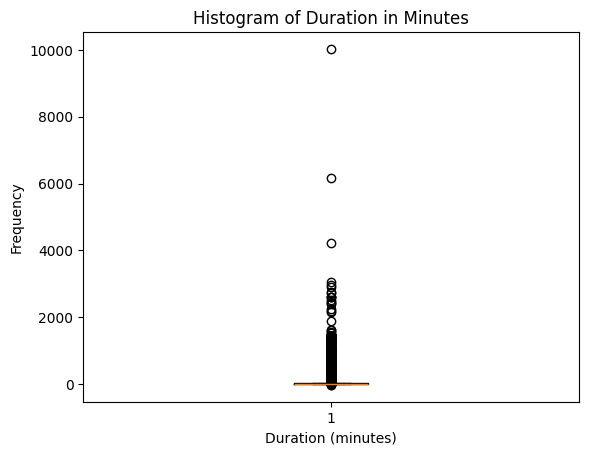

In [13]:
# plot the duration in min
plt.boxplot(df['duration']) 
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration in Minutes')
plt.show()

In [14]:
df_sub = df[(df['duration']>=1) & (df['duration']<=60)]

In [15]:
print(f"There is {df_sub.shape[0]/df.shape[0]*100} of rows remaining after removing the outliers")

There is 98.1220282212598 of rows remaining after removing the outliers


### Homework Q4
- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

In [16]:
#separating the locations (pick up and drop off)
categorical = ['PULocationID', 'DOLocationID']



In [17]:
# separating the trip distance
numerical = ['trip_distance']


In [18]:

df_sub[categorical] = df_sub[categorical].astype(str)

/var/folders/dd/nb8m5vwd1sz3_s49jh1plcfr0000gn/T/ipykernel_65862/4041162812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[categorical] = df_sub[categorical].astype(str)


In [19]:
#create a disc (train set) including PU and DO locations and the trip distance
train_dicts = df_sub[categorical + numerical].to_dict(orient='records')


dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [20]:
# dimensionality of matrix
X_train.ndim

2

### Homework Q5
- Train a plain linear regression model with default parameters
- Calculate the RMSE of the model on the training data

In [21]:
# define the target
target = 'duration_min'
y_train = df_sub[target].values

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)


mean_squared_error(y_train, y_pred, squared=False)


/Users/isabellevea/anaconda3/envs/mlops-zoomcamp/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.658402488539416

In [25]:
#double checking RMSE calulation
import numpy as np
import math
MSE = np.square(np.subtract(y_train,y_pred)).mean()   

rsme = math.sqrt(MSE)  
print(f"The rmse on the train set is: {rsme}")

The rmse on the train set is: 7.658402488539416


/var/folders/dd/nb8m5vwd1sz3_s49jh1plcfr0000gn/T/ipykernel_65862/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/dd/nb8m5vwd1sz3_s49jh1plcfr0000gn/T/ipykernel_65862/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

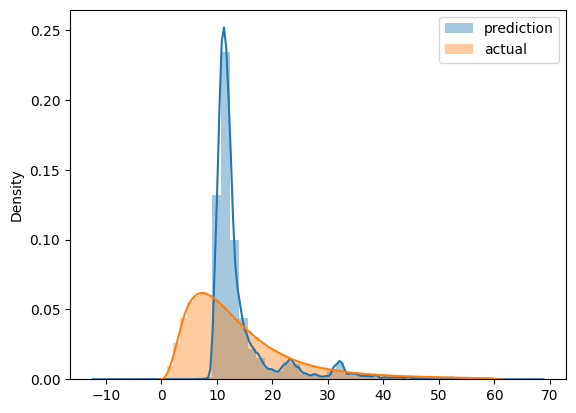

In [24]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [30]:
df_sub.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_min
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333,10.833333


In [38]:
#function to load data and prepare df for machine learning

def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    print(df.head())
    
    print(df.columns.to_list())

    df['duration'] = df['tpep_dropoff_datetime'] - df['lpep_pickup_datetime']
    df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

### Homework Q6
Let's load the February 2023 set as the validation set

In [39]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


KeyError: 'lpep_pickup_datetime'

In [ ]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

In [ ]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['lpep_pickup_datetime']

In [28]:
len(df_train), len(df_val)

NameError: name 'df_train' is not defined

In [29]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

NameError: name 'df_train' is not defined

In [ ]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

In [ ]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)